<a href="https://colab.research.google.com/github/Subash-456/fabric_defect_detection/blob/main/fabric_defect_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def defect_detect(image):
  img=image.copy()
  hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  h=hsv[:,:,0]
  s=hsv[:,:,1]
  v=hsv[:,:,2]

  blr = cv2.blur(v,(15,15))

  dst = cv2.fastNlMeansDenoising(blr,None,10,7,21)

  _, binary = cv2.threshold(dst, 127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  kernel = np.ones((5,5),np.uint8)

  erosion = cv2.erode(binary,kernel,iterations = 1)
  dilation = cv2.dilate(binary,kernel,iterations = 1)

  if(dilation==0).sum() >1:
    print("defective fabric")
    contours,_ = cv2.findContours(dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for i in contours:
      if cv2.contourArea(i) < 261121.0:
        cv2.drawContours(img , i, -1,(0,255,0),3)
  else:
      print("Godd fabric")
  return image,hsv,v,blr,dst,binary,dilation,img

defective fabric


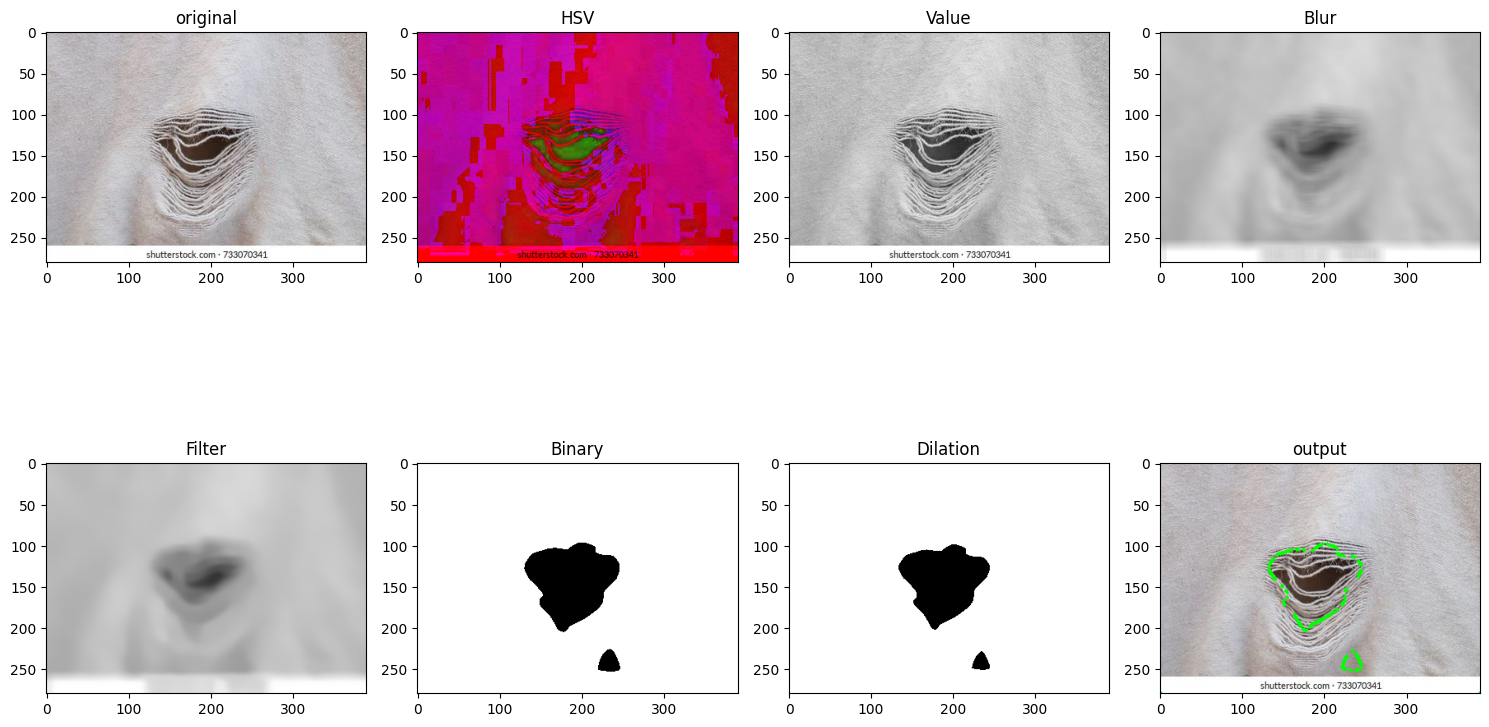

In [ ]:
input_image=cv2.imread('Fabric.jpeg')
image,hsv,v,blr,dst,binary,dilation,img=defect_detect(input_image)

fig, ax=plt.subplots(2,4,figsize=(15,10))
ax[0,0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0,0].set_title('original')
ax[0,1].imshow(cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB))
ax[0,1].set_title('HSV')
ax[0,2].imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
ax[0,2].set_title('Value')
ax[0,3].imshow(cv2.cvtColor(blr, cv2.COLOR_BGR2RGB))
ax[0,3].set_title('Blur')
ax[1,0].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
ax[1,0].set_title('Filter')
ax[1,1].imshow(binary,cmap='gray')
ax[1,1].set_title('Binary')
ax[1,2].imshow(dilation,cmap='gray')
ax[1,2].set_title('Dilation')
ax[1,3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1,3].set_title('output')
fig.tight_layout()